# Boosting

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from joblib import dump, load

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import tree

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,targetBooleano

[###] All Done                                              


In [4]:
from utilities import score, df_feat, df_targ, train_val

### Codigo a correr

In [5]:
MAX_JOBS = 5

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [6]:
runSimple = False
runValidated = False
runValidated2 = True

**Save :** Guardar Modelo (pisa anterior)

In [7]:
saveSimple = True
saveValidated = True
saveValidated2 = True

### Preprocesamiento

In [8]:
targetBooleano(df_targ, inplace=True)
reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)

,id,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,...,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,y,m,d
0,74816,247.5,225.0,0.0,78.0,74.0,True,4.0,68.0,7.0,...,48.0,17.9,11.6,17.2,14.8,26.0,17.0,2014,6,7
1,64318,202.5,0.0,0.0,14.0,56.0,True,4.0,5.8,1.0,...,61.0,41.8,22.0,40.2,28.1,31.0,11.0,2014,12,7
2,54357,90.0,90.0,2.6,79.0,47.0,False,4.0,0.0,8.0,...,57.0,19.0,3.1,15.9,13.7,33.0,19.0,2010,7,8
3,1762,337.5,247.5,0.0,92.0,96.0,True,3.0,5.0,8.0,...,54.0,21.5,19.3,19.2,19.4,31.0,13.0,2015,11,4
4,89422,45.0,22.5,0.0,14.0,37.0,False,4.0,0.0,2.0,...,50.0,35.7,18.4,34.8,26.9,19.0,13.0,2014,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102351,49272,157.5,90.0,6.5,63.0,44.0,False,3.8,0.4,6.0,...,72.0,20.5,9.6,13.8,14.6,37.0,20.0,2012,5,23
102352,13885,270.0,315.0,2.1,65.0,80.0,True,1.6,5.2,7.0,...,48.0,15.4,8.9,14.3,11.8,31.0,30.0,2011,10,25
102353,4586,247.5,337.5,0.0,81.0,62.0,False,4.0,0.0,7.0,...,35.0,17.9,9.6,15.3,14.6,2.0,6.0,2015,12,16
102354,68030,45.0,67.5,0.9,79.0,65.0,False,2.2,0.0,8.0,...,56.0,12.8,5.9,9.8,9.6,24.0,17.0,2010,8,18


In [9]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102356 entries, 0 to 102355
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            102356 non-null  int64  
 1   direccion_viento_tarde        102356 non-null  float64
 2   direccion_viento_temprano     102356 non-null  float64
 3   horas_de_sol                  102356 non-null  float64
 4   humedad_tarde                 102356 non-null  float64
 5   humedad_temprano              102356 non-null  float64
 6   llovieron_hamburguesas_hoy    102356 non-null  bool   
 7   mm_evaporados_agua            102356 non-null  float64
 8   mm_lluvia_dia                 102356 non-null  float64
 9   nubosidad_tarde               102356 non-null  float64
 10  nubosidad_temprano            102356 non-null  float64
 11  presion_atmosferica_tarde     102356 non-null  float64
 12  presion_atmosferica_temprano  102356 non-nul

In [10]:
train_feat, val_feat, train_targ, val_targ = train_val( df_feat, df_targ )

In [11]:
train_targ = train_targ.llovieron_hamburguesas_al_dia_siguiente
val_targ = val_targ.llovieron_hamburguesas_al_dia_siguiente

## Entrenamiento

### Simple

In [12]:
if (runSimple):
    boost_simple = GradientBoostingClassifier(
        random_state=1,
        max_depth=3,
        min_samples_split=200,
    )
    boost_simple.fit( train_feat, train_targ )
    
    # Guardar
    if(saveSimple):
        dump(boost_simple, 'models/Ensambles/boost_simple.sk') 
else:
    # Cargar
    boost_simple = load('models/Ensambles/boost_simple.sk')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
ACCURACY: 0.841051191871825
PRESICION: 0.46593886462882095
RECALL: 0.7253569000679809
CONFUSION MATRIX


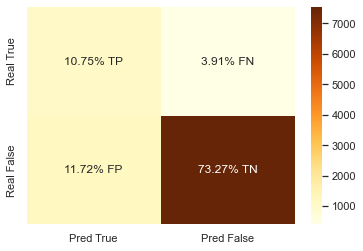

In [13]:
%time
pred_s = boost_simple.predict(val_feat)
score(pred_s, val_targ)

### Validado

In [14]:
if( runValidated ):
    boost = GradientBoostingClassifier(
        random_state=1,
    )
    
    params = {
        'max_depth': np.arange(1, 20, 1),
        'min_samples_leaf': np.arange(50, 1000, 50),
        'n_estimators': np.arange(50,500,50),
        'loss': ['deviance', 'exponential'],
        'learning_rate': [0.05,0.1,0.2],
    }
    
    boost_grid = RandomizedSearchCV(
        boost,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1
    ).fit(train_feat, train_targ)
    
    # Guardar
    if(saveValidated):
        dump(boost_grid, 'models/Ensambles/boost_grid.sk')
else:
    # Cargar
    boost_grid = load('models/Ensambles/boost_grid.sk')

In [15]:
print(f"Best score: {boost_grid.best_score_}")
print(f"Best params {boost_grid.best_params_}")

Best score: 0.8900215501117197
Best params {'n_estimators': 300, 'min_samples_leaf': 450, 'max_depth': 17, 'loss': 'deviance', 'learning_rate': 0.05}


In [16]:
boost = boost_grid.best_estimator_

AUC-ROC: 0.7353058911847107
ACCURACY: 0.8491598280578351
PRESICION: 0.7222884386174017
RECALL: 0.5292576419213973
CONFUSION MATRIX
CPU times: user 451 ms, sys: 12.5 ms, total: 463 ms
Wall time: 431 ms


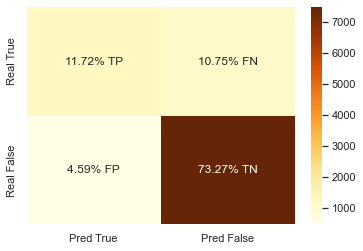

In [17]:
%%time
pred = boost.predict(val_feat)
prob = boost.predict_proba(val_feat)
score(val_targ, pred, prob[:,1])

In [18]:
if(saveValidated):
    dump(boost, 'models/Ensambles/boost.sk')

### Optimizando mas hiperparametros

In [19]:
if( runValidated2 ):
    boost2 = GradientBoostingClassifier(
        random_state=1,
    )
    
    params = {
        'max_depth': np.arange(15, 19, 1),
        'min_samples_leaf': np.arange(50, 200, 50),
        'min_samples_split': np.arange(50, 200, 50),
        'n_estimators': np.arange(200,500,100),
        'loss': ['deviance', 'exponential'],
        'learning_rate': [0.03,0.05,0.07],
        'criterion' :['friedman_mse','squared_error']
    }
    
    boost_grid2 = HalvingGridSearchCV(
        boost2,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1
    ).fit(train_feat, train_targ)
    
    # Guardar
    if(saveValidated2):
        dump(boost_grid2, 'models/Ensambles/boost2_grid.sk')
else:
    # Cargar
    boost_grid2 = load('models/Ensambles/boost2_grid.sk')

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 126
max_resources_: 92120
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1296
n_resources: 126
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
----------
iter: 1
n_candidates: 432
n_resources: 378
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
----------
iter: 2
n_candidates: 144
n_resources: 1134
Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------
iter: 3
n_candidates: 48
n_resources: 3402
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------
iter: 4
n_candidates: 16
n_resources: 10206
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 5
n_candidates: 6
n_resources: 30618
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 6
n_candidates: 2
n_resources: 91854
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [20]:
print(f"Best score: {boost_grid2.best_score_}")
print(f"Best params {boost_grid2.best_params_}")

Best score: 0.8880131564342968
Best params {'criterion': 'squared_error', 'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 18, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [21]:
boost2 = boost_grid2.best_estimator_

AUC-ROC: 0.7309102819578003
ACCURACY: 0.8515044939429465
PRESICION: 0.743979721166033
RECALL: 0.5126637554585153
CONFUSION MATRIX
CPU times: user 547 ms, sys: 24.1 ms, total: 571 ms
Wall time: 537 ms


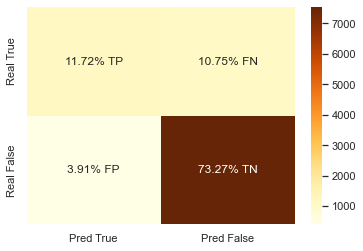

In [22]:
%%time
pred2 = boost2.predict(val_feat)
prob2 = boost2.predict_proba(val_feat)
score(val_targ, pred2, prob2[:,1])

In [23]:
if(saveValidated2):
    dump(boost2, 'models/Ensambles/boost2.sk')